In [1]:
import numpy as np


# set expectations and observation
expBkg = 1000
expSig = 0
obs = 1100

# assume background is perfectly known
sigObs = obs - expBkg
sigErr = obs**0.5

# significance from zero
nsigma = (sigObs/sigErr)

print('Saw', obs, 'events')
print('Expect', expBkg, 'background')
print('Infer nSig =',sigObs,'+/-', sigErr)
print('This is', '{:4.2f}'.format(nsigma), 'sigma from 0')



Saw 1100 events
Expect 1000 background
Infer nSig = 100 +/- 33.166247903554
This is 3.02 sigma from 0


In [2]:
# now check this with toys

# generate some toys from the background only expectation
np.random.seed(210187)
vals = np.random.poisson(expBkg, size=100000)

# compute the p-value of observation (i.e. fraction of toys which are larger than the observation)
pval = len(vals[vals>=obs]) / len(vals)

# convert to sigma using chi2 distribution
from scipy.stats import chi2
nsigma_1side = (chi2.ppf(1-2*pval,1))**0.5
nsigma_2side = (chi2.ppf(1-pval,1))**0.5

print('p-value from toys is', pval)
print('1-sided conversion is', '{:4.2f}'.format(nsigma_1side), 'sigma from 0')
print('2-sided conversion is', '{:4.2f}'.format(nsigma_2side), 'sigma from 0')





p-value from toys is 0.00089
1-sided conversion is 3.12 sigma from 0
2-sided conversion is 3.32 sigma from 0


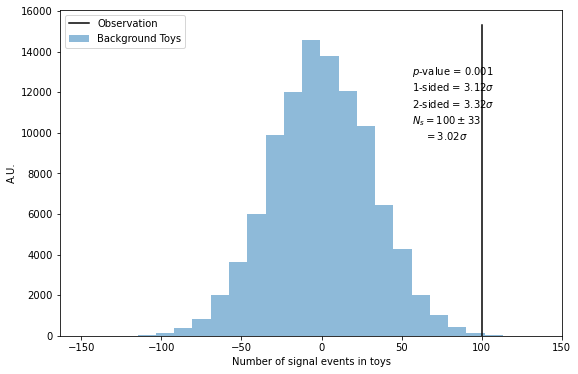

In [3]:
# make a plot
import matplotlib.pyplot as plt
f = plt.figure(figsize=(9,6))
h = plt.hist( vals-expBkg, bins=25, alpha=0.5, label='Background Toys' )
plt.xlabel('Number of signal events in toys')
plt.ylabel('A.U.')
ylim = plt.ylim()
plt.plot((sigObs,sigObs), (0,ylim[1]), 'k-', label='Observation')
plt.text( 0.7, 0.8 ,'$p$-value = {:5.3f}'.format(pval), transform=plt.gca().transAxes)
plt.text( 0.7, 0.75,'1-sided = ${:4.2f}\sigma$'.format(nsigma_1side), transform=plt.gca().transAxes)
plt.text( 0.7, 0.7 ,'2-sided = ${:4.2f}\sigma$'.format(nsigma_2side), transform=plt.gca().transAxes)
plt.text( 0.7, 0.65,'$N_s = {:2.0f} \pm {:2.0f}$'.format(sigObs,sigErr), transform=plt.gca().transAxes)
plt.text( 0.7, 0.6 ,'    $= {:4.2f}\sigma$'.format(nsigma), transform=plt.gca().transAxes)
l = plt.legend()

